## 回帰とは

* 機械学習の手法は、**教師あり学習** と **教師なし学習** に分類でき、  
更に教師あり学習は、 **回帰** と **分類** の問題に分けることができる。
* **回帰** は、入力に対して連続した数値を対応付ける手法で、  
ざっくり言うと最適な関数を導き出して予測すること。

## やること

以下の[対象データ](#対象データ)を使って、上体起こしの回数を予測する回帰モデルを作ってみる。

### モデルを作る?

入力データに対して最適な予測値を出す関数とそのパラメータを決定すること。  

$$
y = a_1x_1 + a_2x_2 + a_3x_3 
$$

という3次元の線形な関数を使うこととして、

$$
a_1 = 2,a_2 = 3,a_3 = 4
$$
が最適パラメータだった的な。

## 対象データ

* [DATA GO.JP](http://www.data.go.jp/?lang=japanese)にある[平成27年度_体力・運動能力調査](http://www.data.go.jp/data/dataset/mext_20161209_0038)  
**1日の運動・スポーツ実施時間別体格測定・テストの結果**
 * 性別 男子
 * 実施状況 ほとんど毎日
 * テスト項目 上体起こし

In [2]:
import numpy as np
import pandas as pd

orgData = np.array(
    [
        [6, 117.42, 21.53, 11.60],  
        [7, 123.10, 24.25, 12.79],
        [8, 128.57, 26.76, 14.71],
        [9, 132.81, 30.01, 16.23],
        [10, 138.83, 34.13, 17.86],  
        [11, 144.61, 38.32, 18.09],
        [12, 152.77, 44.46, 20.48],
        [13, 158.35, 48.88, 24.56],
        [14, 164.43, 51.80, 27.28],
        [15, 167.10, 56.58, 26.68],
        [16, 168.95, 57.49, 27.44],
        [17, 170.15, 59.51, 29.59],
        [18, 170.76, 60.16, 29.06],
        [19, 171.56, 61.78, 29.08],
        [20, 171.71, 64.50, 27.01],
        [25, 171.86, 67.17, 26.47],
        [30, 172.23, 68.03, 25.10],
        [35, 171.79, 69.04, 23.35],
        [40, 171.62, 69.75, 22.33],
        [45, 171.12, 69.74, 21.51],
        [50, 170.75, 69.24, 20.32],
        [55, 169.38, 66.08, 22.83],
        [60, 167.72, 64.67, 20.66],
        [65, 165.84, 62.54, 16.19]
    ]
)

df = pd.DataFrame(orgData, columns=('年齢','身長(cm)','体重(kg)','回数'))
df.set_index('年齢')

,身長(cm),体重(kg),回数
年齢,,,
6.0,117.42,21.53,11.60
7.0,123.10,24.25,12.79
8.0,128.57,26.76,14.71
9.0,132.81,30.01,16.23
10.0,138.83,34.13,17.86
11.0,144.61,38.32,18.09
12.0,152.77,44.46,20.48
13.0,158.35,48.88,24.56
14.0,164.43,51.80,27.28


## 目的関数

予測の精度判断に使用する **目的関数** を決める。 今回は **平均二乗誤差** を使う

### 平均二乗誤差

* 以下MSE(mean squire error)と表記する場合がある
* 標準偏差SD(standard deviation) $ = \sqrt{MSE}$
* 入力データ($t_n$)とモデルから得られた値($y_n$)の二乗誤差の和を入力データ数($N$)で割った値
* この値が **最小** のものが最適
$$
J=\frac{1}{N}\sum_{n=0}^{N-1} (y_n - t_n)^2
$$


## 1次元直線モデル

まずは、年齢だけを入力データとしたモデルを作成する  
(もうプロットしたデータを見た時点で、単純な1次元直線じゃ無理だとわかるがやる)

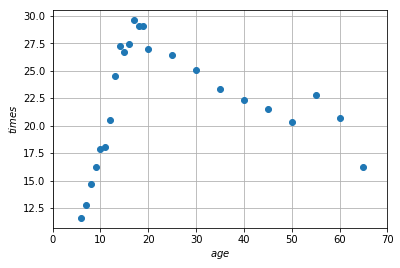

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

ages = orgData[:,0]
times = orgData[:,3]

age_min = 0
age_max = ages.max() + 5

plt.plot(ages, times, marker='o', linestyle='None')
plt.xlim(age_min, age_max)
plt.grid(True)
plt.xlabel('$age$')
plt.ylabel('$times$')
plt.show()

モデル(直線)の式は以下であり、平均二乗誤差($J$)が最小になる$w_{0}$と$w_{1}$を見つける
$$
y(x) = w_{0}x + w_{1}
$$


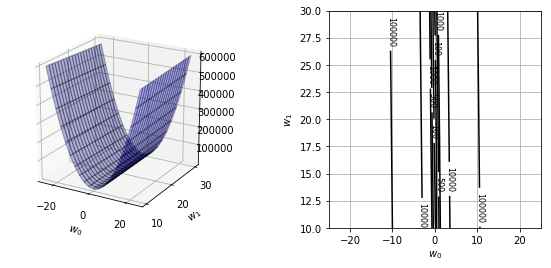

min J([89],[100])=31.31979648114931, w0=0.12562814070351536, w1=18.944723618090453


In [4]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# 平均誤差関数
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 計算
xn = 200
w0 = np.linspace(-25, 25, xn)
w1 = np.linspace(10, 30, xn)
## 格子作成
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(ages, times, (w0[i0], w1[i1]))

# 表示
plt.figure(figsize=(9.5, 4))
## sublot間の横幅の空き(wspace)
plt.subplots_adjust(wspace=0.5)

## 平均二乗誤差 J
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([10, 20, 30])
ax.set_xlabel('$w_{0}$')
ax.set_ylabel('$w_{1}$')
ax.view_init(20, -60)

## 平均二乗誤差Jの等高線表示
plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 5, colors='black', levels=[100, 500, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.xlabel('$w_{0}$')
plt.ylabel('$w_{1}$')
plt.show()

## Jの最小値
minJ = J.min()
minJIndex = np.where(J == minJ)
w = (w0[minJIndex[1][0]], w1[minJIndex[0][0]])
print('min J({0},{1})={2}, w0={3}, w1={4}'
      .format(minJIndex[0], minJIndex[1], minJ, w[0], w[1]))

上記で求めた$w_{0}$と$w_{1}$で直線書いてみる。

w0=0.126, w1=18.945
MSE=31.320 cm^2
SD=5.596 cm


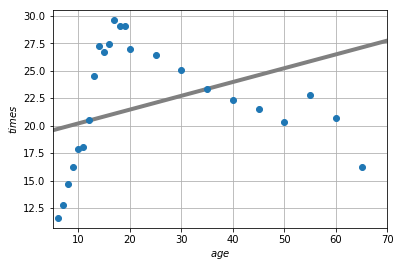

In [5]:
# 線の表示
def show_line(w):
    xb = np.linspace(age_min, age_max, 100)
    y = w[0]* xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

W = np.array([w[0], w[1]])
mse = mse_line(ages, times, W)
print("w0={0:.3f}, w1={1:.3f}".format(w[0], w[1]))
print("MSE={0:.3f} cm^2".format(mse))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(ages, times, marker='o', linestyle='None')
plt.xlim(age_min, age_max)
plt.grid(True)
plt.xlabel('$age$')
plt.ylabel('$times$')
plt.show()

まぁこんなかんじになるよね・・  
次は入力変数に身長を追加してモデルを作ってみる。

## 2次元面モデル

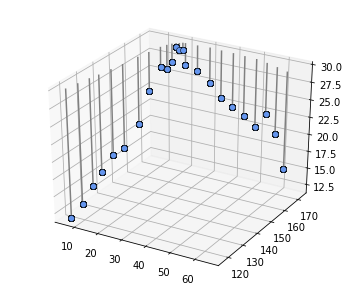

In [12]:
heights = orgData[:,1]

def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
               [30, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
               color='cornflowerblue', markeredgecolor='black',
               markersize=6, markeredgewidth=0.5)

plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1, projection='3d')
show_data2(ax, ages, heights, times)
plt.show()

2次元なのでモデルは面になり、1次元同様平均二乗誤差($J$)が最小になる$w_{0}$、$w_{1}$と$w_{2}$を見つける
$$
y(x) = w_{0}x_{0} + w_{1}x_{1} +  w_{2}
$$

w0=0.4, w1=-0.2, w2=43.3
SD=8.925 cm


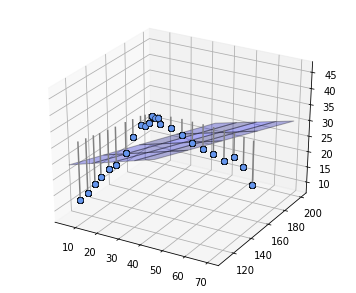

In [19]:
height_min = 110
height_max = 200

def show_plane(ax, w):
    px0 = np.linspace(age_min, age_max, 5)
    px1 = np.linspace(height_min, height_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                   color='blue', edgecolor='black')

def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    mse = np.mean((y-t)**2)
    return mse

def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w2 =  -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2])

plt.figure(figsize=(6,5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(ages, heights, times)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, ages, heights, times)
mse = mse_plane(ages, heights, times, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

標準偏差増えてるやんけ・・  
はい終了。  
上体起こしの回数を予測するうえで身長の情報はなくても良さそうという感じ

## 線形基底関数モデル

多次元にしたとしても、直線近似は限界があるので曲線の関数でモデルを作ってみる。  
1次元の **ガウス関数** を使ってみる

### ガウス関数

$$
\phi_{j}(x) = exp\{-\frac{(x - \mu_{j})^2}{2s^2}\}
$$


W=[-21.8  18.7  -2.9   4.3  20.1]
SD=1.32 cm


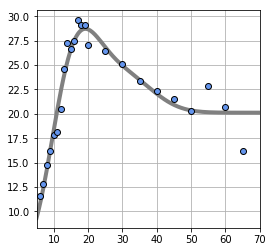

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gauss(x, mu,s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j],s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse

def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

def show_gauss_func(w):
    xb = np.linspace(age_min, age_max, 200)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

plt.figure(figsize=(4 ,4))
M = 4
W = fit_gauss_func(ages, times, M)
show_gauss_func(W)
plt.plot(ages, times, marker='o', linestyle='None',
        color='cornflowerblue', markeredgecolor='black')
plt.xlim(age_min, age_max)
plt.grid(True)
mse = mse_gauss_func(ages, times, W)
print('W='+str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

標準偏差もだいぶ下がって  
ぱっと見でも精度があがってるのがわかる

## 一見精度の良さそうなモデルができたけど・・

* 自分でやるにはちょっと手間なので概要だけ

## 過学習（over fitting）

* 次元の追加など過度の教師あり学習を行った場合、未学習の問いに対して正しく答えを出力できなくなる現象。  
入力変数に対しては、正確に追従しようとする分、ぐにゃぐにゃした形状になりやすく  
結果、学習のしすぎによって判断の基準が厳しくなるため、少しでもパターンが異なると誤った答えを出力してしまう。

## ホールドアウト検証（hold out validation）

* 上記の過学習を発見するために、入力データを以下の用途で分ける検証方法。
 * モデルを作るための **訓練データ**
 * 訓練データによって最適化したモデルに対して、平均二乗誤差を算出するための
 **テストデータ**

## 交差検証（cross validation）

* ホールドアウト検証の分割を何パターンも繰り返し行う手法
* 分け方による結果のバラつきを少なるすることできる

交差検証を繰り返して最適なモデルを導き出す